In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
#Reading file
cwd=os.getcwd()
filename=cwd+ '/project3/train_users_2.csv'
filename2=cwd+'/project3/test_users.csv'
train= pd.read_csv(filename,parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
test=pd.read_csv(filename2,parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])

In [3]:
train.drop('id',axis=1, inplace=True)
print(train)

       date_account_created timestamp_first_active date_first_booking  \
0                2010-06-28    2009-03-19 04:32:55                NaT   
1                2011-05-25    2009-05-23 17:48:09                NaT   
2                2010-09-28    2009-06-09 23:12:47         2010-08-02   
3                2011-12-05    2009-10-31 06:01:29         2012-09-08   
4                2010-09-14    2009-12-08 06:11:05         2010-02-18   
...                     ...                    ...                ...   
213446           2014-06-30    2014-06-30 23:56:36                NaT   
213447           2014-06-30    2014-06-30 23:57:19                NaT   
213448           2014-06-30    2014-06-30 23:57:54                NaT   
213449           2014-06-30    2014-06-30 23:58:22                NaT   
213450           2014-06-30    2014-06-30 23:58:24                NaT   

           gender   age signup_method  signup_flow language affiliate_channel  \
0       -unknown-   NaN      facebook     

In [55]:
print(train.keys())
train.isnull().sum().sum()# mange missing values
data= train.loc[:, train.columns != 'country_destination'].values
target=train.loc[:, train.columns == 'country_destination'].values
print(data)
print(target)


Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination'],
      dtype='object')
[[Timestamp('2010-06-28 00:00:00') Timestamp('2009-03-19 04:32:55') NaT
  ... 'Web' 'Mac Desktop' 'Chrome']
 [Timestamp('2011-05-25 00:00:00') Timestamp('2009-05-23 17:48:09') NaT
  ... 'Web' 'Mac Desktop' 'Chrome']
 [Timestamp('2010-09-28 00:00:00') Timestamp('2009-06-09 23:12:47')
  Timestamp('2010-08-02 00:00:00') ... 'Web' 'Windows Desktop' 'IE']
 ...
 [Timestamp('2014-06-30 00:00:00') Timestamp('2014-06-30 23:57:54') NaT
  ... 'Web' 'Mac Desktop' 'Firefox']
 [Timestamp('2014-06-30 00:00:00') Timestamp('2014-06-30 23:58:22') NaT
  ... 'iOS' 'iPhone' 'Mobile Safari']
 [Timestamp('2014-06-30 00:00:00') Timestamp('2014-06-30 23:58:24') NaT
  ... 'iOS' 'iP

In [62]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date_first_booking,124543,58.347349
age,87990,41.222576
first_affiliate_tracked,6065,2.841402
country_destination,0,0.000000
first_browser,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000
language,0,0.000000


In [29]:
train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [65]:
#det er noen rart 
print(sum(train.age > 120))
print(sum(train.age < 18))
##veldig rart
train.loc[train.age > 100, 'age'] = np.nan
train.loc[train.age < 15, 'age'] = np.nan

781
158


In [67]:
train.describe()

,age,signup_flow
count,123059.000000,213451.000000
mean,36.559211,3.267387
std,11.690611,7.637707
min,15.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,42.000000,0.000000
max,100.000000,25.000000


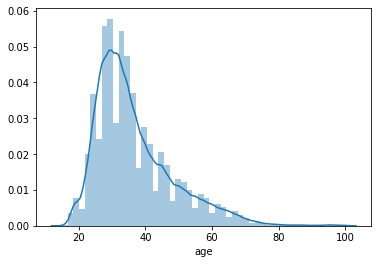

In [66]:
#dropna-->every row is ommitted, in which data are missing,
sns.distplot(train['age'].dropna())

In [31]:
##categorical categories
for i in ("gender","signup_method","language","affiliate_channel","affiliate_provider","first_affiliate_tracked",
          "signup_app","first_device_type","first_browser"):
    values_counts=train[i].value_counts()
    print("These are the observed values for " + str(i) + ":")
    print(values_counts)

These are the observed values for gender:
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64
These are the observed values for signup_method:
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
These are the observed values for language:
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64
These are the observed values for affiliate_channel:
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
These are the observed values for 

In [32]:
##unknown values with 
train.loc[train.gender == '-unknown-','gender'] = np.nan
train.loc[train.first_affiliate_tracked=='untracked','first_affiliate_tracked']=np.nan
train.loc[train.first_browser=='-unknown','first_browser']=np.nan

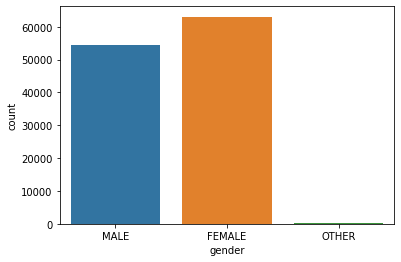

In [33]:
sns.countplot(train['gender'])

In [34]:
# Formatting data account creation variable
train['dac_year'] = train.date_account_created.dt.year
train['dac_month'] = train.date_account_created.dt.month
train['dac_day'] = train.date_account_created.dt.day

# Formatting time first active variable
train['tfa_year'] = train.timestamp_first_active.dt.year
train['tfa_month'] = train.timestamp_first_active.dt.month
train['tfa_day'] = train.timestamp_first_active.dt.day

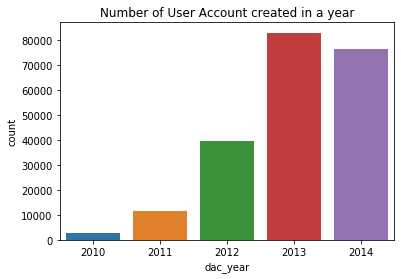

In [41]:
plt.title('Number of User Account created in a year')
sns.countplot(train['dac_year'])

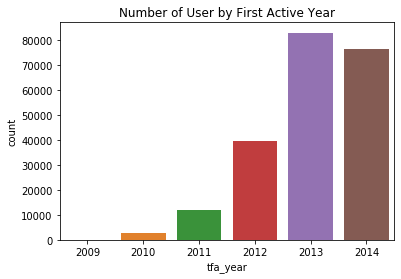

In [42]:
plt.title('Number of User by First Active Year')
sns.countplot(train['tfa_year'])

In [43]:
#train.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
FEMALE,15.0,100.0,36.236936,56741
MALE,15.0,100.0,36.800917,49969
OTHER,17.0,78.0,36.888889,225


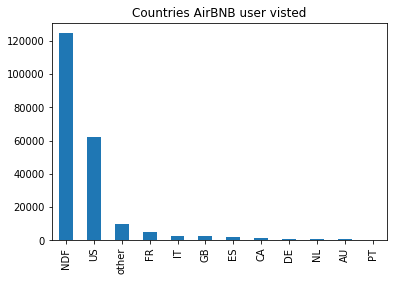

In [44]:
plt.title('Countries AirBNB user visted')
train['country_destination'].value_counts().plot(kind='bar')

In [68]:
# get dummies
train = pd.get_dummies(train,columns=["gender","signup_method","language","affiliate_channel","affiliate_provider","first_affiliate_tracked",
          "signup_app","first_device_type","first_browser"])

In [69]:
print(train)

       date_account_created timestamp_first_active date_first_booking   age  \
0                2010-06-28    2009-03-19 04:32:55                NaT   NaN   
1                2011-05-25    2009-05-23 17:48:09                NaT  38.0   
2                2010-09-28    2009-06-09 23:12:47         2010-08-02  56.0   
3                2011-12-05    2009-10-31 06:01:29         2012-09-08  42.0   
4                2010-09-14    2009-12-08 06:11:05         2010-02-18  41.0   
...                     ...                    ...                ...   ...   
213446           2014-06-30    2014-06-30 23:56:36                NaT  32.0   
213447           2014-06-30    2014-06-30 23:57:19                NaT   NaN   
213448           2014-06-30    2014-06-30 23:57:54                NaT  32.0   
213449           2014-06-30    2014-06-30 23:58:22                NaT   NaN   
213450           2014-06-30    2014-06-30 23:58:24                NaT   NaN   

        signup_flow country_destination  gender_-un